## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
from tensorflow import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*((x - x.min()) / (x.max() - x.min())-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y,num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128,128,128]):
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units,activation="softmax",name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290  

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 16ms/step - loss: 1.6807 - accuracy: 0.4002 - val_loss: 1.5482 - val_accuracy: 0.4545
Epoch 2/100
196/196 [==============================] - 3s 14ms/step - loss: 1.4669 - accuracy: 0.4814 - val_loss: 1.4348 - val_accuracy: 0.4965
Epoch 3/100
196/196 [==============================] - 3s 14ms/step - loss: 1.3421 - accuracy: 0.5245 - val_loss: 1.4277 - val_accuracy: 0.4848
Epoch 4/100
196/196 [==============================] - 3s 14ms/step - loss: 1.2577 - accuracy: 0.5567 - val_loss: 1.3625 - val_accuracy: 0.5223
Epoch 5/100
196/196 [==============================] - 3s 15ms/step - loss: 1.1695 - accuracy: 0.5834 - val_loss: 1.3547 - val_accuracy: 0.5234
Epoch 6/100
196/196 [==============================] - 3s 14ms/step - loss: 1.0980 - accuracy: 0.6110 - val_loss: 1.3419 - val_accuracy: 0.5307
Epoch 7/100
196/196 [==============================] - 3s 16ms/step - loss: 1.0185 - accuracy: 0.6370 - val_loss: 1.3740 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 0.1167 - accuracy: 0.9621 - val_loss: 3.8539 - val_accuracy: 0.5232
Epoch 58/100
196/196 [==============================] - 3s 13ms/step - loss: 0.0965 - accuracy: 0.9683 - val_loss: 3.9780 - val_accuracy: 0.5279
Epoch 59/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0945 - accuracy: 0.9686 - val_loss: 3.8759 - val_accuracy: 0.5207
Epoch 60/100
196/196 [==============================] - 3s 15ms/step - loss: 0.0954 - accuracy: 0.9682 - val_loss: 4.0175 - val_accuracy: 0.5328
Epoch 61/100
196/196 [==============================] - 3s 14ms/step - loss: 0.0936 - accuracy: 0.9698 - val_loss: 4.0183 - val_accuracy: 0.5212
Epoch 62/100
196/196 [==============================] - 3s 13ms/step - loss: 0.1110 - accuracy: 0.9642 - val_loss: 3.9870 - val_accuracy: 0.5273
Epoch 63/100
196/196 [==============================] - 2s 12ms/step - loss: 0.1067 - accuracy: 0.9654 - val_loss: 3.7658 - val_accuracy: 0.529

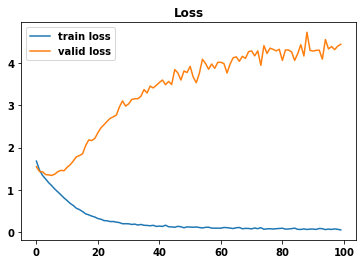

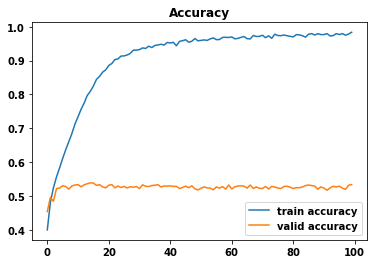

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()